<a href="https://colab.research.google.com/github/M-SAAD-BIN-MAZHAR/100DaysOFDeeplearning/blob/main/DataAugumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
img=image.load_img('/content/Golden.png',target_size=(200,200))

In [5]:
import matplotlib.pyplot as plt

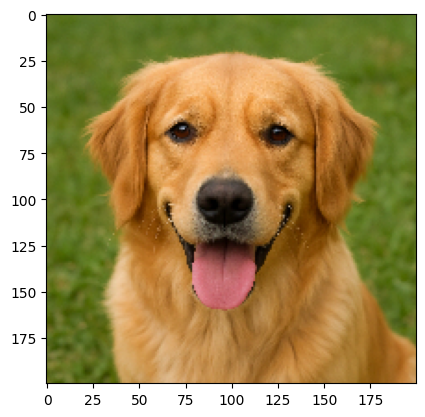

In [6]:
plt.imshow(img)

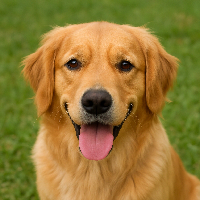

In [7]:
img

In [17]:
datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'

         )

In [18]:
img=image.img_to_array(img)

In [19]:
img.shape

(200, 200, 3)

In [20]:
input_batch=img.reshape((1,200,200,3))

In [21]:
i=0
for output in datagen.flow(input_batch,batch_size=1,save_to_dir='aug'):
  i=i+1
  if i==10:
    break

In [16]:
input_batch.shape

(1, 200, 200, 3)

In [30]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/DOG',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/aug',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


In [24]:
!ls /content/DOG
!ls /content/DOG/Dogs
!ls /content/DOG/Cats


Cats  Dogs
cat.png
gol.png


In [25]:
!mv /content/DOG/Cats /content/DOG/cats
!mv /content/DOG/Dogs /content/DOG/dogs


In [26]:
!find /content/DOG -type f ! -name "*.jpg" ! -name "*.jpeg" ! -name "*.png" -delete


In [29]:
train_generator = train_datagen.flow_from_directory(
    '/content/DOG',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

print("Classes:", train_generator.class_indices)
print("Images found:", train_generator.samples)


Found 2 images belonging to 2 classes.
Classes: {'cats': 0, 'dogs': 1}
Images found: 2


In [28]:
!rm -r /content/DOG/.ipynb_checkpoints


In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)